In [12]:

import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore")

data = pd.read_csv('/Users/aoamacsplace/Documents/mosaic/new2/simulated_data.csv')

conditions = {
    'followCount': (500, 1000),
    'totalProposalInteraction': (100, 200),
    'totalNft': (40, 50),
    'totalVotes': (1000, 2000)
}

def filter_ens_names(data, conditions):
    filtered_names = data.copy()
    for column, (min_value, max_value) in conditions.items():
        filtered_names = filtered_names[(filtered_names[column] >= min_value) & (filtered_names[column] <= max_value)]
    filtered_ens_names = filtered_names[['ensName']].reset_index(drop=True)
    return filtered_ens_names

filtered_ens_names = filter_ens_names(data, conditions)
selected_columns = ['ensName', 'followCount', 'totalProposalInteraction', 'totalNft', 'totalVotes']
filtered_ens_data = data[data['ensName'].isin(filtered_ens_names['ensName'])][selected_columns].reset_index(drop=True)
print("Filtered ENS Data:")
print(filtered_ens_data)

fig = px.bar(filtered_ens_data.sort_values(by='totalNft', ascending=False), x='ensName', y=selected_columns, title='Filtered ENS Data',
             color_discrete_map={'totalVotes': 'blue'})

fig.show()




Filtered ENS Data:
     ensName  followCount  totalProposalInteraction  totalNft  totalVotes
0   b37e20a6          839                       100        42        1551
1   afee7bc3          682                       100        49        1554
2   a12a7483          514                       100        44        1363
3   1d983773          924                       100        50        1275
4   6f8c9f46          931                       100        44        1462
5   ac39d3c9          933                       100        46        1728
6   5b9e5105          914                       100        40        1657
7   67805880          536                       100        44        1830
8   73803bc8          918                       100        46        1148
9   445143a0          733                       100        47        1985
10  99a5ebc4          821                       100        44        1666
11  4e8cacb6          814                       100        42        1026


In [13]:

total_ens = len(filtered_ens_data)
total_followers = filtered_ens_data['followCount'].sum()
average_followers = filtered_ens_data['followCount'].mean()
max_followers = filtered_ens_data['followCount'].max()
min_followers = filtered_ens_data['followCount'].min()
total_votes = filtered_ens_data['totalVotes'].sum()
average_votes = filtered_ens_data['totalVotes'].mean()
max_votes = filtered_ens_data['totalVotes'].max()
min_votes = filtered_ens_data['totalVotes'].min()
total_proposals = filtered_ens_data['totalProposalInteraction'].sum()
average_proposals = filtered_ens_data['totalProposalInteraction'].mean()
max_proposals = filtered_ens_data['totalProposalInteraction'].max()
min_proposals = filtered_ens_data['totalProposalInteraction'].min()
total_nft = filtered_ens_data['totalNft'].sum()
average_nft = filtered_ens_data['totalNft'].mean()
max_nft = filtered_ens_data['totalNft'].max()
min_nft = filtered_ens_data['totalNft'].min()

print("Network Engagement Model Statistics:")
print("Total ENS Names:", total_ens)
print("Total Followers:", total_followers)
print("Average Followers:", average_followers)
print("Max Followers:", max_followers)
print("Min Followers:", min_followers)
print("Total Votes:", total_votes)
print("Average Votes:", average_votes)
print("Max Votes:", max_votes)
print("Min Votes:", min_votes)
print("Total Proposals:", total_proposals)
print("Average Proposals:", average_proposals)
print("Max Proposals:", max_proposals)
print("Min Proposals:", min_proposals)
print("Total NFT:", total_nft)
print("Average NFT:", average_nft)
print("Max NFT:", max_nft)
print("Min NFT:", min_nft)


Network Engagement Model Statistics:
Total ENS Names: 12
Total Followers: 9559
Average Followers: 796.5833333333334
Max Followers: 933
Min Followers: 514
Total Votes: 18245
Average Votes: 1520.4166666666667
Max Votes: 1985
Min Votes: 1026
Total Proposals: 1200
Average Proposals: 100.0
Max Proposals: 100
Min Proposals: 100
Total NFT: 538
Average NFT: 44.833333333333336
Max NFT: 50
Min NFT: 40


Network Growth Rate:
Empty DataFrame
Columns: [Month, Growth Rate (%)]
Index: []

Network Activity:
  Statistic       Value
0     count   12.000000
1      mean  796.583333
2       std  150.474678
3       min  514.000000
4       25%  720.250000
5       50%  830.000000
6       75%  919.500000
7       max  933.000000

Network Diversity:
      Platform  Count
0   ensTwitter     12
1  ensTelegram     12
2    ensGithub     12
3     ensEmail     12

Network Engagement:
  Statistic        Value
0     count    12.000000
1      mean  1520.416667
2       std   280.947571
3       min  1026.000000
4       25%  1341.000000
5       50%  1552.500000
6       75%  1681.500000
7       max  1985.000000

Network NFT Adoption:
  Statistic      Value
0     count  12.000000
1      mean   6.166667
2       std   2.691175
3       min   2.000000
4       25%   4.000000
5       50%   6.000000
6       75%   8.250000
7       max  10.000000
No data available for plotting.


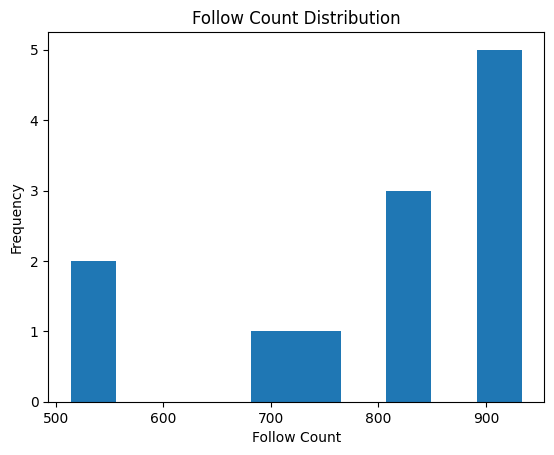

In [14]:

filtered_data = data[data['ensName'].isin(filtered_ens_names['ensName'])]


# Network Growth Rate
filtered_data['date_created'] = pd.to_datetime(filtered_data['date_created'], errors='coerce')
monthly_new_ens_names = filtered_data.groupby(filtered_data['date_created'].dt.to_period('M')).size()
percentage_change = (monthly_new_ens_names.pct_change() * 100).fillna(0)
growth_rate_df = pd.DataFrame({'Month': monthly_new_ens_names.index, 'Growth Rate (%)': percentage_change})


# Network Activity
average_follow_count = filtered_data['followCount'].mean()
follow_count_distribution = filtered_data['followCount'].describe()
activity_df = pd.DataFrame({'Statistic': follow_count_distribution.index, 'Value': follow_count_distribution.values})

# Network Diversity
unique_social_media_platforms = filtered_data[['ensTwitter', 'ensTelegram', 'ensGithub', 'ensEmail']].nunique()
diversity_index = -sum((unique_social_media_platforms / unique_social_media_platforms.sum()) * np.log(unique_social_media_platforms / unique_social_media_platforms.sum()))
diversity_df = pd.DataFrame({'Platform': unique_social_media_platforms.index, 'Count': unique_social_media_platforms.values})

# Network Engagement
average_total_votes = filtered_data['totalVotes'].mean()
total_votes_distribution = filtered_data['totalVotes'].describe()
average_proposal_interaction = filtered_data['totalProposalInteraction'].mean()
proposal_interaction_distribution = filtered_data['totalProposalInteraction'].describe()
engagement_df = pd.DataFrame({'Statistic': total_votes_distribution.index, 'Value': total_votes_distribution.values})

# Network NFT Adoption
nft_adoption_percentage = (filtered_data['totalNft'] > 0).mean()
average_rewards_nft = filtered_data['rewardsNft'].mean()
rewards_nft_distribution = filtered_data['rewardsNft'].describe()
nft_adoption_df = pd.DataFrame({'Statistic': rewards_nft_distribution.index, 'Value': rewards_nft_distribution.values})

print("Network Growth Rate:")
print(growth_rate_df)
print("\nNetwork Activity:")
print(activity_df)
print("\nNetwork Diversity:")
print(diversity_df)
print("\nNetwork Engagement:")
print(engagement_df)
print("\nNetwork NFT Adoption:")
print(nft_adoption_df)

if not monthly_new_ens_names.empty:
    fig, ax = plt.subplots()
    monthly_new_ens_names.plot(kind='line', ax=ax)
    ax.set_xlabel('Month')
    ax.set_ylabel('New ENS Names')
    ax.set_title('Monthly New ENS Names')
    plt.show()
else:
    print("No data available for plotting.")


plt.figure()

filtered_data['followCount'].plot(kind='hist', bins=10)
plt.xlabel('Follow Count')
plt.ylabel('Frequency')
plt.title('Follow Count Distribution')

plt.show()



In [22]:

filtered_ens_datan = data[data['ensName'].isin(filtered_ens_names['ensName'])].reset_index(drop=True)

# Count unique social media platforms
unique_social_media_platforms = filtered_ens_datan[['ensTwitter', 'ensTelegram', 'ensGithub', 'ensEmail']].nunique()

# Create a pie chart
labels = unique_social_media_platforms.index
values = unique_social_media_platforms.values

fig = go.Figure(data=[go.Pie(labels=labels, values=values)])

fig.update_layout(
    title='Unique Social Media Platforms',
)

fig.show()
